In [1]:
import pandas as pd
import numpy as np

## Load data from csv file

In [2]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over 
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds 
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""



"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [3]:
print ('df is an object of ', type(df))
print ('\n')
print(df.head(5))
print(df.shape)

df is an object of  <class 'pandas.core.frame.DataFrame'>


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


### Store values in the pandas dataframe as numpy arrays
- we want to use the average number of rooms to predict the housing price
- we need to extract the data from df and convert them to numpy arrays

In [4]:
y = df['PRICE'].values
x = df['RM'].values
print ('both x and y are now objects of', type(x))

both x and y are now objects of <class 'numpy.ndarray'>


### Plot the housing price against the average number of rooms

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

# Guess a line to fit the data

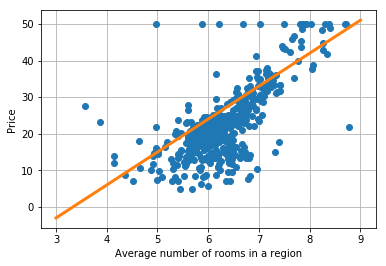

In [6]:
w1 = 9
w0 = -30
xplt = np.linspace(3,9,100)
yplt = w1*xplt + w0
plt.plot(x,y,'o')    # Plot the data points

plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()


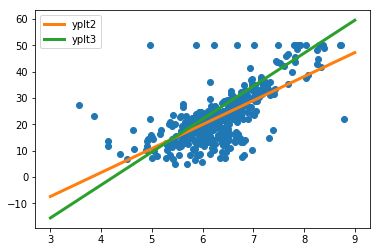

In [7]:
## Other possible guesses
yplt2=9.1*xplt -34.67
yplt3=12.5*xplt-53
plt.plot(x,y,'o') 
plt.plot(xplt,yplt2,'-',linewidth=3,label='yplt2') 
plt.plot(xplt,yplt3,'-',linewidth=3,label='yplt3') 
plt.legend()

## Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE) to determine goodness of fit

- Notice how ** 2 acts on numpy arrays
- Notice how numpy broadcast computation between scalars and vectors

In [8]:
print ((0.83) ** 2)
print (np.array([1, 2, 3 ]) ** 2)

0.6889
[1 4 9]


In [9]:
print (x.shape)
yhat1 = 9*x-30
print (yhat1.shape)


(506,)
(506,)


In [10]:
yhat1 = 9*x-30
yhat2 = 9.1*x-34.67
yhat3 = 12.5*x-53
yhat4 = 10.5*x-43

# Mean Squared Error

MSE1 = np.mean((y-yhat1)**2)
MSE2 = np.mean((y-yhat2)**2)
MSE3 = np.mean((y-yhat3)**2)
MSE4 = np.mean((y-yhat4)**2)

print(MSE1)
print(MSE2)
print(MSE3)
print(MSE4)


59.83774942094861
43.600713565355726
58.4404171813241
44.77113069515811


- Notice how np.abs acts on vectors

In [11]:
print(np.abs(-2))
print(np.abs(np.array([-1,-2,3])))

2
[1 2 3]


In [12]:
# Mean Aboslute Error
MAE1 = np.mean(np.abs(y-yhat1))
MAE2 = np.mean(np.abs(y-yhat2))
MAE3 = np.mean(np.abs(y-yhat3))
print(MAE1)
print(MAE2)
print(MAE3)

5.807100790513834
4.448047628458498
5.315242094861659


## Computing MSE with non-vectorized vs vectorized code
- For simplicity, let us use only first 10 samples


In [13]:
N = 10
df = df.head(N)

In [14]:
x = df['RM'].values # feature
y = df['PRICE'].values # label

# let's print out the values of x and y
print ('x = ', x)
print ('y = ', y)


x =  [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]
y =  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [15]:
# Let us evaluate the MSE of the model f(x) = 9*x - 30 on the dataset (x,y)
# The non-vectorized code goes like this:

sum_of_square_errors = 0
for i in range(N):
  yhat_i = 9*x[i] - 30
  sum_of_square_errors = sum_of_square_errors + (y[i] - yhat_i) ** 2
MSE = sum_of_square_errors/N

print (MSE)

11.7182829


### The vectorized code goes like this:


In [16]:
yhat = 9*x - 30 # note that x is a vector, hence yhat is also a vector
difference = y - yhat # the difference is still a vector
z = difference ** 2 # the ** 2 acts on each element of the vector; the result is still a vector
MSE = np.mean(z) # np.mean() sums all elements of z and diveded by its size (N=10)
print (MSE)

11.718282900000002


In [17]:
print (difference)
print (difference ** 2)

[-5.175 -6.189  0.035  0.418  1.877  0.83  -1.208  1.552 -4.179 -5.136]
[2.6780625e+01 3.8303721e+01 1.2250000e-03 1.7472400e-01 3.5231290e+00
 6.8890000e-01 1.4592640e+00 2.4087040e+00 1.7464041e+01 2.6378496e+01]
